<a href="https://colab.research.google.com/github/efemeryczny/tsp/blob/main/tsp_kmwd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Define the city graph with distances
city_graph = {
    'Wroclaw': {'Katowice': 196, 'Krakow': 273, 'Warszawa': 355, 'Szczecin': 398, 'Poznan': 181, 'Lodz': 222, 'Olsztyn': 509, 'Kielce': 348, 'Gdansk': 483, 'Bydgoszcz': 311, 'Rzeszow': 437, 'Opole': 98, 'Lublin': 240, 'Bialystok': 452, 'Zielona Gora': 192},
    'Katowice': {'Wroclaw': 196, 'Krakow': 81, 'Warszawa': 294, 'Szczecin': 571, 'Poznan': 380, 'Lodz': 203, 'Olsztyn': 472, 'Kielce': 159, 'Gdansk': 519, 'Bydgoszcz': 405, 'Rzeszow': 245, 'Opole': 113, 'Lublin': 413, 'Bialystok': 488, 'Zielona Gora': 365},
    'Krakow': {'Wroclaw': 273, 'Katowice': 81, 'Warszawa': 291, 'Szczecin': 648, 'Poznan': 457, 'Lodz': 281, 'Olsztyn': 511, 'Kielce': 114, 'Gdansk': 596, 'Bydgoszcz': 482, 'Rzeszow': 167, 'Opole': 190, 'Lublin': 335, 'Bialystok': 495, 'Zielona Gora': 442},
    'Warszawa': {'Wroclaw': 355, 'Katowice': 294, 'Krakow': 291, 'Szczecin': 566, 'Poznan': 313, 'Lodz': 133, 'Olsztyn': 214, 'Kielce': 178, 'Gdansk': 340, 'Bydgoszcz': 306, 'Rzeszow': 330, 'Opole': 312, 'Lublin': 173, 'Bialystok': 199, 'Zielona Gora': 457},
    'Szczecin': {'Wroclaw': 398, 'Katowice': 571, 'Krakow': 648, 'Warszawa': 566, 'Poznan': 264, 'Lodz': 473, 'Olsztyn': 538, 'Kielce': 619, 'Gdansk': 370, 'Bydgoszcz': 259, 'Rzeszow': 812, 'Opole': 472, 'Lublin': 733, 'Bialystok': 754, 'Zielona Gora': 213},   
    'Poznan': {'Wroclaw': 181, 'Katowice': 380, 'Krakow': 457, 'Warszawa': 313, 'Szczecin': 264, 'Lodz': 218, 'Olsztyn': 351, 'Kielce': 364, 'Gdansk': 311, 'Bydgoszcz': 138, 'Rzeszow': 625, 'Opole': 285, 'Lublin': 478, 'Bialystok': 498, 'Zielona Gora': 153},
    'Lodz': {'Wroclaw': 222, 'Katowice': 203, 'Krakow': 281, 'Warszawa': 133, 'Szczecin': 473, 'Poznan': 218, 'Olsztyn': 291, 'Kielce': 153, 'Gdansk': 340, 'Bydgoszcz': 226, 'Rzeszow': 445, 'Opole': 203, 'Lublin': 306, 'Bialystok': 327, 'Zielona Gora': 348},
    'Olsztyn': {'Wroclaw': 509, 'Katowice': 472, 'Krakow': 511, 'Warszawa': 214, 'Szczecin': 538, 'Poznan': 351, 'Lodz': 291, 'Kielce': 397, 'Gdansk': 166, 'Bydgoszcz': 212, 'Rzeszow': 552, 'Opole': 492, 'Lublin': 395, 'Bialystok': 226, 'Zielona Gora': 498},
    'Kielce': {'Wroclaw': 348, 'Katowice': 159, 'Krakow': 114, 'Warszawa': 178, 'Szczecin': 619, 'Poznan': 364, 'Lodz': 153, 'Olsztyn': 397, 'Gdansk': 470, 'Bydgoszcz': 356, 'Rzeszow': 156, 'Opole': 265, 'Lublin': 193, 'Bialystok': 382, 'Zielona Gora': 507},
    'Gdansk': {'Wroclaw': 483, 'Katowice': 519, 'Krakow': 596, 'Warszawa': 340, 'Szczecin': 370, 'Poznan': 311, 'Lodz': 340, 'Olsztyn': 166, 'Kielce': 470, 'Bydgoszcz': 166, 'Rzeszow': 678, 'Opole': 536, 'Lublin': 521, 'Bialystok': 391, 'Zielona Gora': 451},
    'Bydgoszcz': {'Wroclaw': 311, 'Katowice': 405, 'Krakow': 482, 'Warszawa': 306, 'Szczecin': 259, 'Poznan': 138, 'Lodz': 226, 'Olsztyn': 212, 'Kielce': 356, 'Gdansk': 166, 'Rzeszow': 634, 'Opole': 414, 'Lublin': 477, 'Bialystok': 414, 'Zielona Gora': 282},
    'Rzeszow': {'Wroclaw': 437, 'Katowice': 245, 'Krakow': 167, 'Warszawa': 330, 'Szczecin': 812, 'Poznan': 625, 'Lodz': 445, 'Olsztyn': 552, 'Kielce': 156, 'Gdansk': 678, 'Bydgoszcz': 634, 'Opole': 355, 'Lublin': 177, 'Bialystok': 413, 'Zielona Gora': 606},
    'Opole': {'Wroclaw': 98, 'Katowice': 113, 'Krakow': 190, 'Warszawa': 312, 'Szczecin': 472, 'Poznan': 285, 'Lodz': 203, 'Olsztyn': 492, 'Kielce': 265, 'Gdansk': 536, 'Bydgoszcz': 414, 'Rzeszow': 355, 'Lublin': 523, 'Bialystok': 507, 'Zielona Gora': 268},
    'Lublin': {'Wroclaw': 350, 'Katowice': 413, 'Krakow': 335, 'Warszawa': 173, 'Szczecin': 733, 'Poznan': 478, 'Lodz': 306, 'Olsztyn': 395, 'Kielce': 193, 'Gdansk': 521, 'Bydgoszcz': 477, 'Rzeszow': 177, 'Opole': 523, 'Bialystok': 350, 'Zielona Gora': 621},
    'Bialystok': {'Wroclaw': 507, 'Katowice': 488, 'Krakow': 495, 'Warszawa': 199, 'Szczecin': 754, 'Poznan': 498, 'Lodz': 327, 'Olsztyn': 226, 'Kielce': 382, 'Gdansk': 391, 'Bydgoszcz': 414, 'Rzeszow': 413, 'Opole': 507, 'Lublin': 350, 'Zielona Gora': 641},
    'Zielona Gora': {'Wroclaw': 192, 'Katowice': 365, 'Krakow': 442, 'Warszawa': 457, 'Szczecin': 213, 'Poznan': 153, 'Lodz': 348, 'Olsztyn': 498, 'Kielce': 507, 'Gdansk': 451, 'Bydgoszcz': 282, 'Rzeszow': 606, 'Opole': 268, 'Lublin': 621, 'Bialystok': 641},
}



Shortest Path: ['Wroclaw', 'Gdansk', 'Kielce', 'Bydgoszcz', 'Olsztyn', 'Rzeszow', 'Lodz', 'Opole', 'Poznan', 'Lublin', 'Szczecin', 'Bialystok', 'Warszawa', 'Krakow', 'Zielona Gora', 'Katowice', 'Wroclaw']
Total Distance: 6464


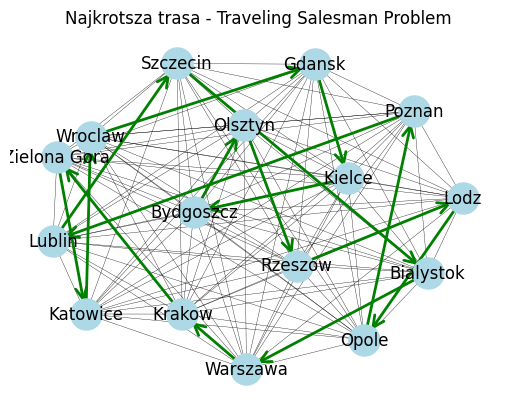

In [78]:
# Create a graph object
G = nx.Graph(city_graph)

# Define the cities to visit
cities = [
    'Wroclaw', 'Katowice','Krakow', 'Warsaw', 'Szczecin', 'Poznan', 'Lodz',
    'Olsztyn', 'Kielce', 'Gdansk', 'Bydgoszcz', 'Rzeszow', 'Opole',
    'Lublin', 'Bialystok', 'Zielona Gora'
]

# Add an edge from the last city to the starting city to complete the cycle
G.add_edge(cities[-1], cities[0], weight=city_graph[cities[-1]][cities[0]])

# Calculate the shortest path
shortest_path = nx.approximation.traveling_salesman_problem(G, weight='weight', cycle=True)

# Print the shortest path
print('Shortest Path:', shortest_path)

# Calculate the total distance of the shortest path
total_distance = sum(city_graph[u][v] for u, v in zip(shortest_path, shortest_path[1:]))
print('Total Distance:', total_distance)

# Visualize the graph and shortest path
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', node_size=500, width=0.25)
nx.draw_networkx_edges(G, pos=pos, edgelist=[(u, v) for u, v in zip(shortest_path, shortest_path[1:])], edge_color='green', width=2, arrows=True, arrowsize=20, arrowstyle='->')
plt.title('Najkrotsza trasa - Traveling Salesman Problem')
plt.axis('off')
plt.show()

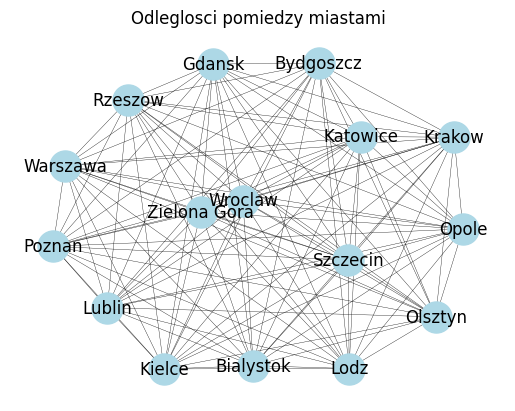

In [69]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', node_size=500, width=0.25)
plt.title('Odleglosci pomiedzy miastami')
plt.axis('off')
plt.show()

In [77]:
city_names = list(city_graph.keys())
num_cities = len(city_names)

distance_matrix = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distance_matrix[i, j] = city_graph[city_names[i]][city_names[j]]

print(distance_matrix)

[[  0. 196. 273. 355. 398. 181. 222. 509. 348. 483. 311. 437.  98. 240.
  452. 192.]
 [196.   0.  81. 294. 571. 380. 203. 472. 159. 519. 405. 245. 113. 413.
  488. 365.]
 [273.  81.   0. 291. 648. 457. 281. 511. 114. 596. 482. 167. 190. 335.
  495. 442.]
 [355. 294. 291.   0. 566. 313. 133. 214. 178. 340. 306. 330. 312. 173.
  199. 457.]
 [398. 571. 648. 566.   0. 264. 473. 538. 619. 370. 259. 812. 472. 733.
  754. 213.]
 [181. 380. 457. 313. 264.   0. 218. 351. 364. 311. 138. 625. 285. 478.
  498. 153.]
 [222. 203. 281. 133. 473. 218.   0. 291. 153. 340. 226. 445. 203. 306.
  327. 348.]
 [509. 472. 511. 214. 538. 351. 291.   0. 397. 166. 212. 552. 492. 395.
  226. 498.]
 [348. 159. 114. 178. 619. 364. 153. 397.   0. 470. 356. 156. 265. 193.
  382. 507.]
 [483. 519. 596. 340. 370. 311. 340. 166. 470.   0. 166. 678. 536. 521.
  391. 451.]
 [311. 405. 482. 306. 259. 138. 226. 212. 356. 166.   0. 634. 414. 477.
  414. 282.]
 [437. 245. 167. 330. 812. 625. 445. 552. 156. 678. 634.   0. 355

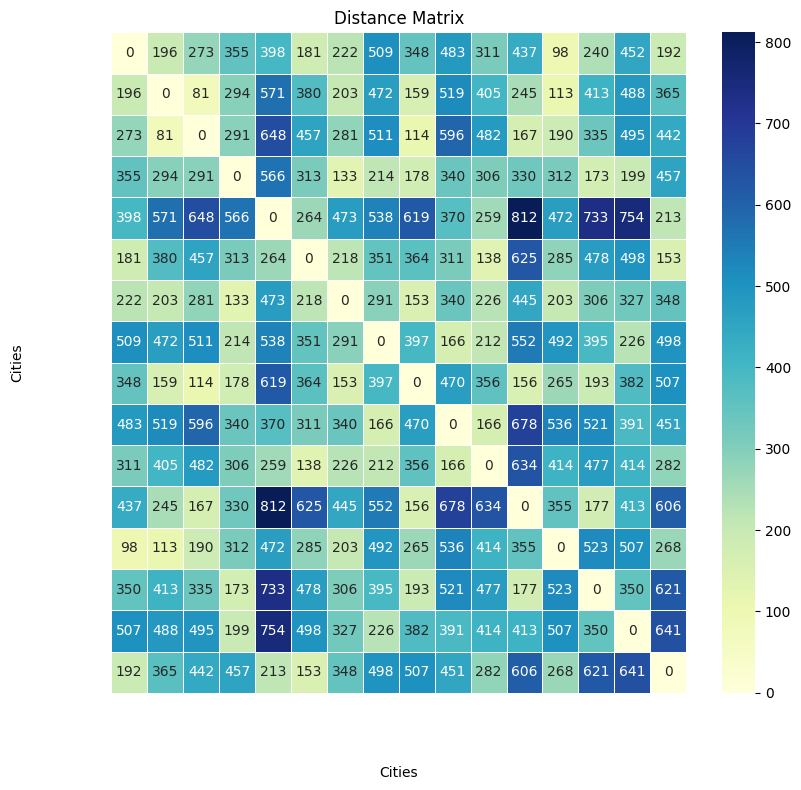

In [81]:
voivodeship_cities = [
    'Wroclaw', 'Katowice', 'Krakow', 'Warszawa', 'Szczecin', 'Poznan',
    'Lodz', 'Olsztyn', 'Kielce', 'Gdansk', 'Bydgoszcz', 'Rzeszow',
    'Opole', 'Lublin', 'Bialystok', 'Zielona Gora'
]
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(distance_matrix, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5, ax=ax)

# Set the title and labels
ax.set_title("Distance Matrix")
ax.set_xlabel("Cities")
ax.set_ylabel("Cities")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the x-axis and y-axis tick labels to the city names
ax.set_xticklabels(voivodeship_cities, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(voivodeship_cities, rotation=0, fontsize=8)

# Show all ticks and label them with white color
ax.tick_params(axis='both', which='both', colors='white')

# Adjust the position of the colorbar to avoid overlapping with the heatmap
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()

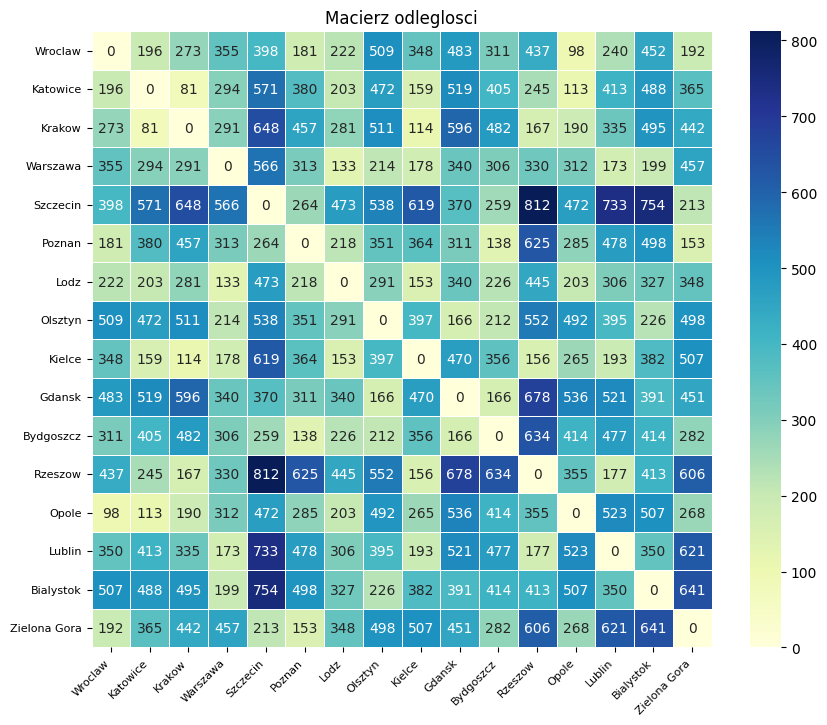

In [87]:
df = pd.DataFrame(distance_matrix, index=city_names, columns=city_names)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
sns.heatmap(df, annot=True, cmap="YlGnBu", linewidths=0.5, ax=ax, fmt=".0f")

# Set the tick labels
ax.set_xticklabels(voivodeship_cities, rotation=45, ha="right", fontsize=8)
ax.set_yticklabels(voivodeship_cities, rotation=0, fontsize=8)

# Add a title
ax.set_title("Macierz odleglosci")

# Display the plot
plt.show()